# GALFITM 实例演示

In [1]:
# import所需的包
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
%matplotlib inline

# 查看配置文件

In [2]:
%cat late_config.feedme

# IMAGE and GALFIT CONTROL PARAMETERS
A) late_g_data.fits,late_r_data.fits,late_i_data.fits,late_z_data.fits,late_y_data.fits
A1) g,r,i,z,y   # Band labels
A2) 4866,6215,7545,8679,9633  # Band wavelengths
B) late_results.fits       # Output data image block
C) late_g_weight.fits,late_r_weight.fits,late_i_weight.fits,late_z_weight.fits,late_y_weight.fits   # Sigma image name (made from weight if blank or "none"
D) late_g_psf.fits,late_r_psf.fits,late_i_psf.fits,late_z_psf.fits,late_y_psf.fits
E) 1                   # PSF fine sampling factor relative to data
F) late_mask.fits,late_mask.fits,late_mask.fits,late_mask.fits,late_mask.fits   # Bad pixel mask (FITS image or ASCII coord list)
G) galfitm_SS.CONSTRAINTS                # File with parameter constraints (ASCII file)
H) 7   238   8   239   # Image region to fit (xmin xmax ymin ymax)
I) 80    80            # Size of the convolution box (x y)
J) 25,25,25,25,25                  # Magnitude photometric zeropoint
K) 0.25  0.25          

# 运行 GALFITM

In [3]:
# 在命令行输入 galfitm config_file_name
# ppt中有运行视频

# 读取拟合结果文件

In [4]:
hdu = fits.open('late_results.fits')
#查看文件目录
hdu.info()

Filename: late_results.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  INPUT_g       1 PrimaryHDU      34   (232, 232)   float32   
  1  INPUT_r       1 ImageHDU        35   (232, 232)   float32   
  2  INPUT_i       1 ImageHDU        35   (232, 232)   float32   
  3  INPUT_z       1 ImageHDU        35   (232, 232)   float32   
  4  INPUT_y       1 ImageHDU        35   (232, 232)   float32   
  5  MODEL_g       1 ImageHDU       319   (232, 232)   float32   
  6  MODEL_r       1 ImageHDU       319   (232, 232)   float32   
  7  MODEL_i       1 ImageHDU       319   (232, 232)   float32   
  8  MODEL_z       1 ImageHDU       319   (232, 232)   float32   
  9  MODEL_y       1 ImageHDU       319   (232, 232)   float32   
 10  RESIDUAL_g    1 ImageHDU         9   (232, 232)   float32   
 11  RESIDUAL_r    1 ImageHDU         9   (232, 232)   float32   
 12  RESIDUAL_i    1 ImageHDU         9   (232, 232)   float32   
 13  RESIDUAL_z    1 ImageHDU         9   (232, 232)

# 查看图像

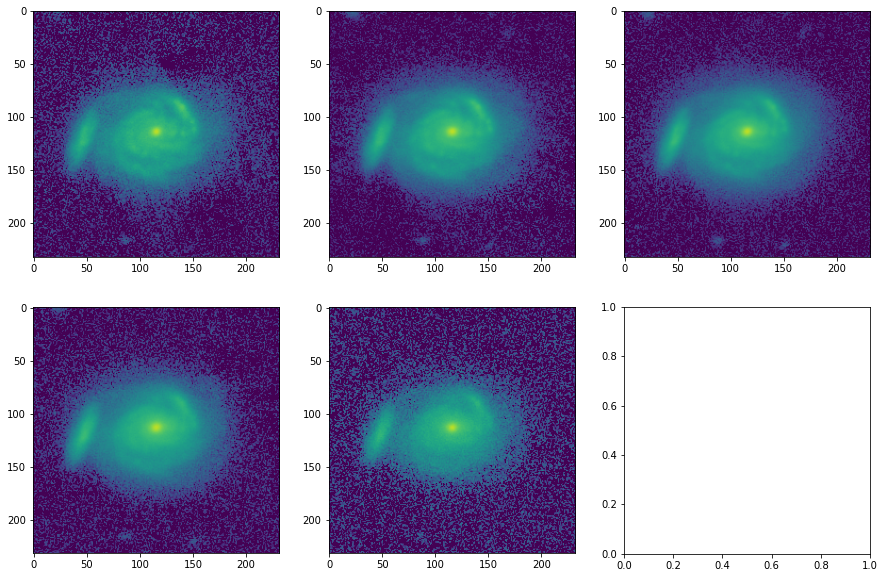

In [5]:
# 查看数据图像
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.ravel()
# 调整normalization
norm0 = simple_norm([0, 2 * np.max(hdu[0].data)], 'log', percent=100)
norm1 = simple_norm([0, 2 * np.max(hdu[1].data)], 'log', percent=100)
norm2 = simple_norm([0, 2 * np.max(hdu[2].data)], 'log', percent=100)
norm3 = simple_norm([0, 2 * np.max(hdu[3].data)], 'log', percent=100)
norm4 = simple_norm([0, 2 * np.max(hdu[4].data)], 'log', percent=100)
ax[0].imshow(hdu[0].data, norm=norm0)  # g 波段
ax[1].imshow(hdu[1].data, norm=norm1)  # r 波段
ax[2].imshow(hdu[2].data, norm=norm2)  # i 波段
ax[3].imshow(hdu[3].data, norm=norm3)  # z 波段
ax[4].imshow(hdu[4].data, norm=norm4)  # y 波段

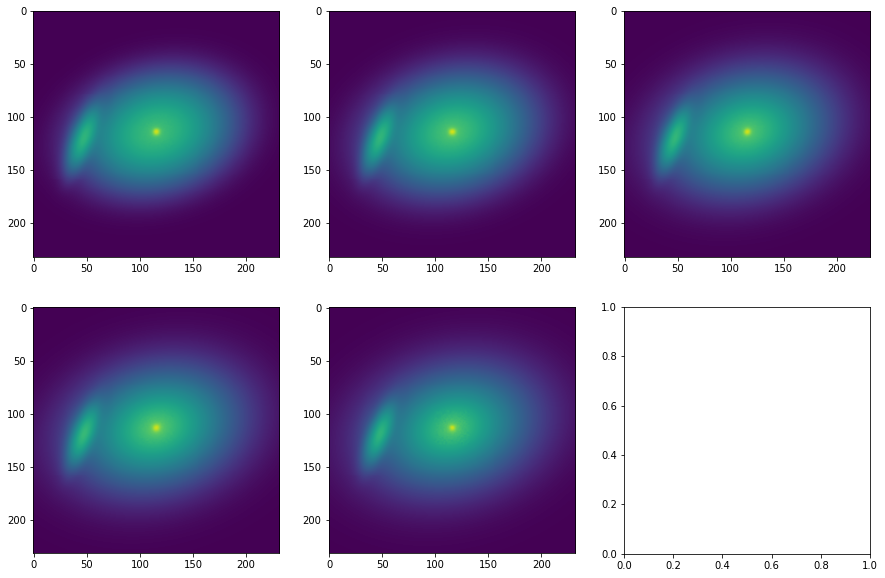

In [6]:
# 查看拟合模型图像
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.ravel()
# 调整normalization
norm0 = simple_norm([0, 2 * np.max(hdu[0].data)], 'log', percent=100)
norm1 = simple_norm([0, 2 * np.max(hdu[1].data)], 'log', percent=100)
norm2 = simple_norm([0, 2 * np.max(hdu[2].data)], 'log', percent=100)
norm3 = simple_norm([0, 2 * np.max(hdu[3].data)], 'log', percent=100)
norm4 = simple_norm([0, 2 * np.max(hdu[4].data)], 'log', percent=100)
ax[0].imshow(hdu[5].data, norm=norm0)
ax[1].imshow(hdu[6].data, norm=norm1)
ax[2].imshow(hdu[7].data, norm=norm2)
ax[3].imshow(hdu[8].data, norm=norm3)
ax[4].imshow(hdu[9].data, norm=norm4)

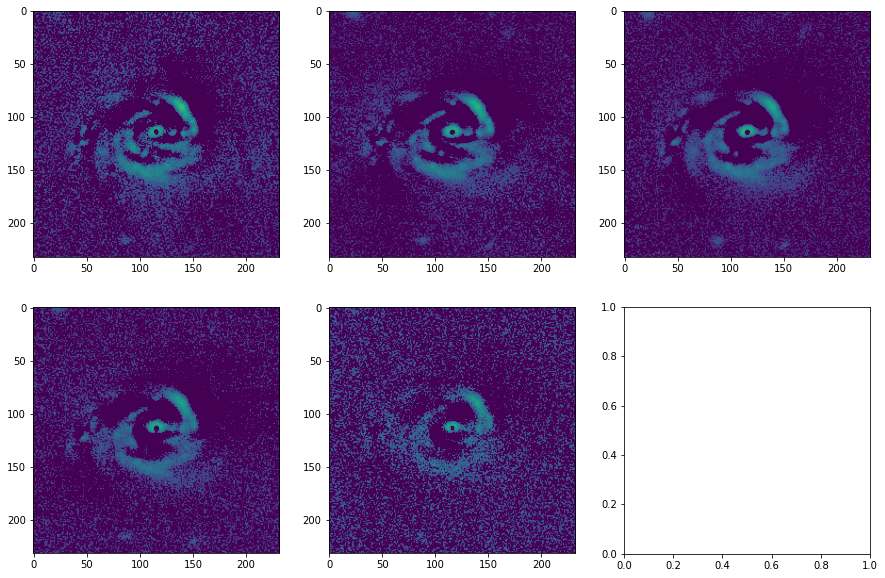

In [7]:
# 查看拟合残差图像
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.ravel()
# 调整normalization
norm0 = simple_norm([0, 2 * np.max(hdu[0].data)], 'log', percent=100)
norm1 = simple_norm([0, 2 * np.max(hdu[1].data)], 'log', percent=100)
norm2 = simple_norm([0, 2 * np.max(hdu[2].data)], 'log', percent=100)
norm3 = simple_norm([0, 2 * np.max(hdu[3].data)], 'log', percent=100)
norm4 = simple_norm([0, 2 * np.max(hdu[4].data)], 'log', percent=100)
ax[0].imshow(hdu[10].data, norm=norm0)
ax[1].imshow(hdu[11].data, norm=norm1)
ax[2].imshow(hdu[12].data, norm=norm2)
ax[3].imshow(hdu[13].data, norm=norm3)
ax[4].imshow(hdu[14].data, norm=norm4)

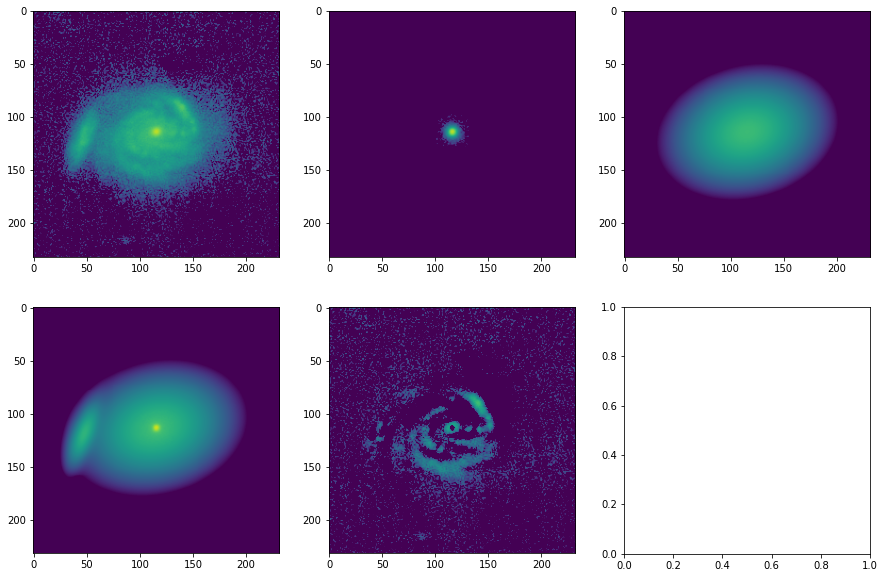

In [8]:
# 比较数据、模型和残差
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.ravel()
# 调整normalization
norm0 = simple_norm([50, 2 * np.max(hdu[0].data)], 'log', percent=100)
ax[0].imshow(hdu[0].data, norm=norm0)  # 数据
ax[1].imshow(hdu[16].data, norm=norm0)  # PSF模型
ax[2].imshow(hdu[17].data, norm=norm0)  # sersic模型
ax[3].imshow(hdu[5].data, norm=norm0)  # 总体数据
ax[4].imshow(hdu[10].data, norm=norm0) # 残差

# 查看拟合参数

In [9]:
# 从fit.log文件中快速查看
%cat fit.log

-----------------------------------------------------------------------------

Input images    : late_g_data.fits,late_r_data.fits,late_i_data.fits,late_z_data.fits,late_y_data.fits [7:238,8:239] 
Init. par. file : late_config.feedme 
Restart file    : late_results.galfit.01 
Output image    : late_results.fits 

 g  : sky       : [122.50, 123.50]  [0.00e+00]  [0.00e+00]  [0.00e+00]
                                [0.00e+00]  [0.00e+00]  [0.00e+00]
 r  : sky       : [122.50, 123.50]  [0.00e+00]  [0.00e+00]  [0.00e+00]
                                [0.00e+00]  [0.00e+00]  [0.00e+00]
 i  : sky       : [122.50, 123.50]  [0.00e+00]  [0.00e+00]  [0.00e+00]
                                [0.00e+00]  [0.00e+00]  [0.00e+00]
 z  : sky       : [122.50, 123.50]  [0.00e+00]  [0.00e+00]  [0.00e+00]
                                [0.00e+00]  [0.00e+00]  [0.00e+00]
 y  : sky       : [122.50, 123.50]  [0.00e+00]  [0.00e+00]  [0.00e+00]
                                [0.00e+00]  [0.00e+00]  [0.00e

In [10]:
# 从header中查看
hdu[5].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  232 / Length of data axis 1                          
NAXIS2  =                  232 / Length of data axis 2                          
PCOUNT  =                    0 / number of random group parameters              
GCOUNT  =                    1 / number of random groups                        
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =             -18567.0 / Pixel coordinate of reference point            
CRPIX2  =             -21538.0 / Pixel coordinate of reference point            
PC1_1   =                 -1.0 / Coordinate transformation matrix element       
CDELT1  =  6.9444446125999E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  6.9444446125999E-

In [11]:
# 提取具体参数及其误差
hdu[5].header['3_RE_G']  # g波段sersic模型Re

'34.4453 +/- 0.0401'